In [ ]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
import imutils
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math
from sklearn.metrics import f1_score

import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import optimizers

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Input, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, width_shift_range=0.1, height_shift_range=0.1)
path = '/content/gdrive/MyDrive/data'
train_generator = train_datagen.flow_from_directory(
        path+'/train',  # this is the target directory
        target_size=(28,28),  # all images will be resized to 28x28
        batch_size=1,
        class_mode='sparse')

validation_generator = train_datagen.flow_from_directory(
        path+'/val',  # this is the target directory
        target_size=(28,28),  # all images will be resized to 28x28 batch_size=1,
        class_mode='sparse')

Found 864 images belonging to 36 classes.
Found 216 images belonging to 36 classes.


In [ ]:
K.clear_session()
model = Sequential()
model.add(Conv2D(16, (22,22), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (16,16), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (8,8), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (4,4), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(36, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=0.0001), metrics='accuracy')

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        23248     
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        131104    
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        131136    
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        65600     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 64)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                        

In [ ]:
batch_size = 1
result = model.fit(
      train_generator,
      steps_per_epoch = train_generator.samples // batch_size,
      validation_data = validation_generator, 
      epochs = 25, verbose=1, callbacks=None)

Epoch 1/25
864/864 [==============================] - 7s 7ms/step - loss: 3.0727 - accuracy: 0.1794 - val_loss: 1.8155 - val_accuracy: 0.4676
Epoch 2/25
864/864 [==============================] - 6s 7ms/step - loss: 1.2541 - accuracy: 0.6227 - val_loss: 0.9271 - val_accuracy: 0.7222
Epoch 3/25
864/864 [==============================] - 6s 7ms/step - loss: 0.6259 - accuracy: 0.8171 - val_loss: 0.5663 - val_accuracy: 0.8333
Epoch 4/25
864/864 [==============================] - 6s 7ms/step - loss: 0.3823 - accuracy: 0.8704 - val_loss: 0.2599 - val_accuracy: 0.9028
Epoch 5/25
864/864 [==============================] - 7s 8ms/step - loss: 0.3127 - accuracy: 0.9005 - val_loss: 0.3000 - val_accuracy: 0.8935
Epoch 6/25
864/864 [==============================] - 6s 7ms/step - loss: 0.2181 - accuracy: 0.9271 - val_loss: 0.1656 - val_accuracy: 0.9444
Epoch 7/25
864/864 [==============================] - 8s 9ms/step - loss: 0.1926 - accuracy: 0.9294 - val_loss: 0.1330 - val_accuracy: 0.9583
Epoch 

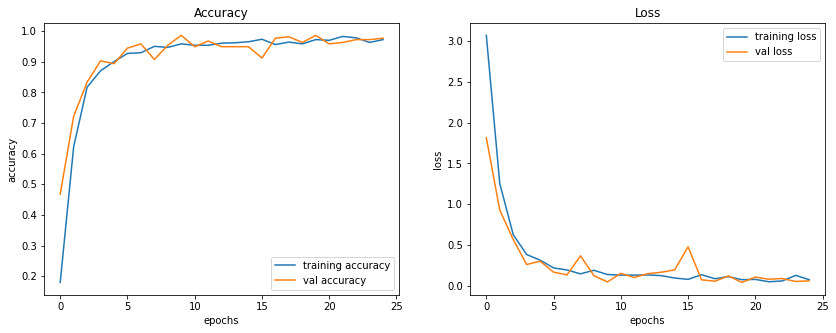

In [ ]:
fig = plt.figure(figsize=(14,5))
grid=gridspec.GridSpec(ncols=2,nrows=1,figure=fig)
fig.add_subplot(grid[0])
plt.plot(result.history['accuracy'], label='training accuracy')
plt.plot(result.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

fig.add_subplot(grid[1])
plt.plot(result.history['loss'], label='training loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [ ]:
# Save the weights
model.save_weights('/content/gdrive/MyDrive/cc3/my_checkpoint')

NameError: ignored

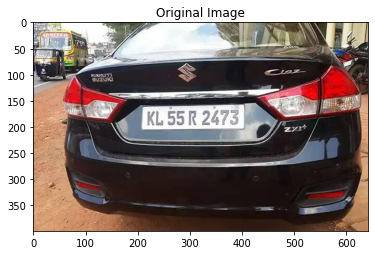

In [ ]:
image = cv2.imread('/content/gdrive/MyDrive/test_dataset/images/1.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

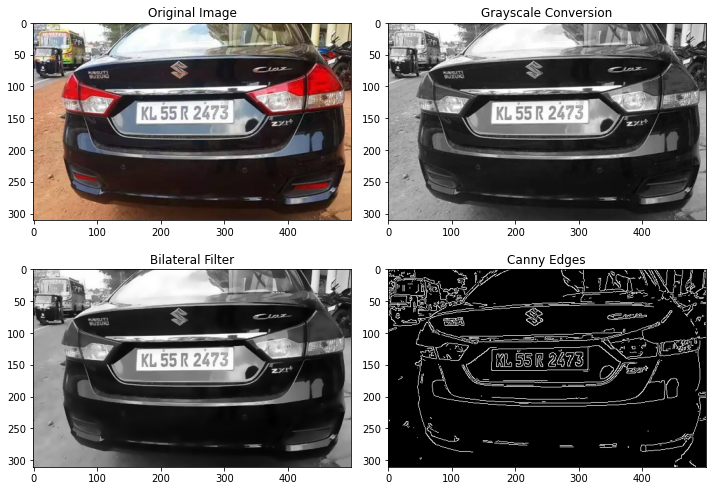

In [ ]:
image = imutils.resize(image, width=500)
img=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
fig, ax = plt.subplots(2, 2, figsize=(10,7))
ax[0,0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0,0].set_title('Original Image')

# RGB to Gray scale conversion
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ax[0,1].imshow(gray, cmap='gray')
ax[0,1].set_title('Grayscale Conversion')

# Noise removal with iterative bilateral filter
gray = cv2.bilateralFilter(gray, 11, 17, 17)
ax[1,0].imshow(gray, cmap='gray')
ax[1,0].set_title('Bilateral Filter')

# Find Edges of the grayscale image
edged = cv2.Canny(gray, 170, 200)
ax[1,1].imshow(edged, cmap='gray')
ax[1,1].set_title('Canny Edges')

fig.tight_layout()
plt.show()

# Find contours based on Edges
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]
cnts=sorted(cnts, key = cv2.contourArea, reverse = True)[:30]
NumberPlateCnt = None #we currently have no Number plate contour

# loop over our contours to find the best possible approximate contour of number plate
count = 0
for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        if len(approx) == 4:  # Select the contour with 4 corners
            NumberPlateCnt = approx #This is our approx Number Plate Contour
            x,y,w,h = cv2.boundingRect(c)
            ROI = img[y:y+h, x:x+w]
            break

if NumberPlateCnt is not None:
    # Drawing the selected contour on the original image
    cv2.drawContours(image, [NumberPlateCnt], -1, (0,255,0), 3)

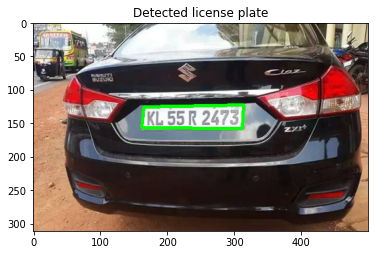

In [ ]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Detected license plate")
plt.show()

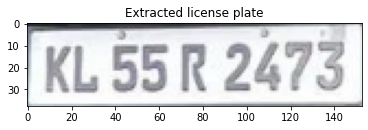

In [ ]:
# Find bounding box and extract ROI
plt.imshow(ROI)
plt.title("Extracted license plate")
plt.show()

In [ ]:
print(NumberPlateCnt)

[[[314 123]]

 [[312 158]]

 [[162 157]]

 [[165 126]]]


In [ ]:
# Distance between (x1, y1) and (x2, y2)
def dist(x1, x2, y1, y2):
    return ((x1-x2)**2+(y1-y2)**2)**0.5

In [ ]:
idx=0
m=0
# To find the index of coordinate with maximum y-coordinate
for i in range(4):
    if NumberPlateCnt[i][0][1]>m:
        idx=i
        m=NumberPlateCnt[i][0][1]

# Assign index to the previous coordinate
if idx==0:
    pin=3
else:
    pin=idx-1

# Assign index to the next coordinate
if idx==3:
    nin=0
else:
    nin=idx+1

# Find distances between the acquired coordinate and its previous and next coordinate
p=dist(NumberPlateCnt[idx][0][0], NumberPlateCnt[pin][0][0], NumberPlateCnt[idx][0][1], NumberPlateCnt[pin][0][1])
n=dist(NumberPlateCnt[idx][0][0], NumberPlateCnt[nin][0][0], NumberPlateCnt[idx][0][1], NumberPlateCnt[nin][0][1])

# The coordinate that has more distance from the acquired coordinate is the required second bottom-most coordinate
if p>n:
    if NumberPlateCnt[pin][0][0]<NumberPlateCnt[idx][0][0]:
        left=pin
        right=idx
    else:
        left=idx
        right=pin
    d=p
else:
    if NumberPlateCnt[nin][0][0]<NumberPlateCnt[idx][0][0]:
        left=nin
        right=idx
    else:
        left=idx
        right=nin
    d=n
print(left, right)

2 1


In [ ]:
left_x=NumberPlateCnt[left][0][0]
left_y=NumberPlateCnt[left][0][1]
right_x=NumberPlateCnt[right][0][0]
right_y=NumberPlateCnt[right][0][1]
print(left_x, left_y, right_x, right_y)

162 157 312 158


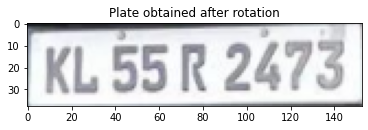

In [ ]:
# Finding the angle of rotation by calculating sin of theta
opp=right_y-left_y
hyp=((left_x-right_x)**2+(left_y-right_y)**2)**0.5
sin=opp/hyp
theta=math.asin(sin)*57.2958

# Rotate the image according to the angle of rotation obtained
image_center = tuple(np.array(ROI.shape[1::-1]) / 2)
rot_mat = cv2.getRotationMatrix2D(image_center, theta, 1.0)
result = cv2.warpAffine(ROI, rot_mat, ROI.shape[1::-1], flags=cv2.INTER_LINEAR)

# The image can be cropped after rotation( since rotated image takes much more height)
if opp>0:
    h=result.shape[0]-opp//2
else:
    h=result.shape[0]+opp//2

result=result[0:h, :]
plt.imshow(result)
plt.title("Plate obtained after rotation")
plt.show()

In [ ]:
# Match contours to license plate or character template
def find_contours(dimensions, img) :

    # Find all contours in the image
    cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Retrieve potential dimensions
    lower_width = dimensions[0]
    upper_width = dimensions[1]
    lower_height = dimensions[2]
    upper_height = dimensions[3]
    
    # Check largest 5 or  15 contours for license plate or character respectively
    cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:15]
    
    ii = cv2.imread('contour.jpg')
    
    x_cntr_list = []
    target_contours = []
    img_res = []
    for cntr in cntrs :
        # detects contour in binary image and returns the coordinates of rectangle enclosing it
        intX, intY, intWidth, intHeight = cv2.boundingRect(cntr)
        
        # checking the dimensions of the contour to filter out the characters by contour's size
        if intWidth > lower_width and intWidth < upper_width and intHeight > lower_height and intHeight < upper_height :
            x_cntr_list.append(intX) #stores the x coordinate of the character's contour, to used later for indexing the contours

            char_copy = np.zeros((44,24))
            # extracting each character using the enclosing rectangle's coordinates.
            char = img[intY:intY+intHeight, intX:intX+intWidth]
            char = cv2.resize(char, (20, 40))
            
            cv2.rectangle(ii, (intX,intY), (intWidth+intX, intY+intHeight), (50,21,200), 2)
            plt.imshow(ii, cmap='gray')
            plt.title('Predict Segments')

            # Make result formatted for classification: invert colors
            char = cv2.subtract(255, char)

            # Resize the image to 24x44 with black border
            char_copy[2:42, 2:22] = char
            char_copy[0:2, :] = 0
            char_copy[:, 0:2] = 0
            char_copy[42:44, :] = 0
            char_copy[:, 22:24] = 0

            img_res.append(char_copy) # List that stores the character's binary image (unsorted)
            
    # Return characters on ascending order with respect to the x-coordinate (most-left character first)
            
    plt.show()
    # arbitrary function that stores sorted list of character indeces
    indices = sorted(range(len(x_cntr_list)), key=lambda k: x_cntr_list[k])
    img_res_copy = []
    for idx in indices:
        img_res_copy.append(img_res[idx])# stores character images according to their index
    img_res = np.array(img_res_copy)

    return img_res

In [ ]:
# Find characters in the resulting images
def segment_characters(image) :

    # Preprocess cropped license plate image
    img_lp = cv2.resize(image, (333, 75))
    img_gray_lp = cv2.cvtColor(img_lp, cv2.COLOR_BGR2GRAY)
    _, img_binary_lp = cv2.threshold(img_gray_lp, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    img_binary_lp = cv2.erode(img_binary_lp, (3,3))
    img_binary_lp = cv2.dilate(img_binary_lp, (3,3))

    LP_WIDTH = img_binary_lp.shape[0]
    LP_HEIGHT = img_binary_lp.shape[1]

    # Make borders white
    img_binary_lp[0:3,:] = 255
    img_binary_lp[:,0:3] = 255
    img_binary_lp[72:75,:] = 255
    img_binary_lp[:,330:333] = 255

    # Estimations of character contours sizes of cropped license plates
    dimensions = [LP_WIDTH/6,
                       LP_WIDTH/2,
                       LP_HEIGHT/10,
                       2*LP_HEIGHT/3]
    plt.imshow(img_binary_lp, cmap='gray')
    plt.title('Contour')
    plt.show()
    cv2.imwrite('contour.jpg',img_binary_lp)

    # Get contours within cropped license plate
    char_list = find_contours(dimensions, img_binary_lp)

    return char_list

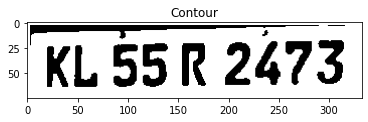

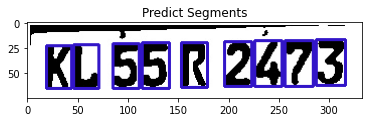

In [ ]:
char=segment_characters(result)

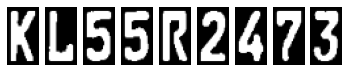

In [ ]:
for i in range(len(char)):
    plt.subplot(1, len(char), i+1)
    plt.imshow(char[i], cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
# Create a new model instance
model = Sequential()

model.add(Conv2D(16, (22,22), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (16,16), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (8,8), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (4,4), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(4,4)))

model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(36, activation='softmax'))

# Restore the weights
model.load_weights('/content/gdrive/MyDrive/cc3/my_checkpoint')

In [ ]:
# Predicting the output
def fix_dimension(img): 
    new_img = np.zeros((28,28,3))
    for i in range(3):
        new_img[:,:,i] = img
        return new_img
def show_results():
    dic = {}
    characters = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    for i,c in enumerate(characters):
        dic[i] = c
    output = []
    for i,ch in enumerate(char): #iterating over the characters
        img_ = cv2.resize(ch, (28,28), interpolation=cv2.INTER_AREA)
        img = fix_dimension(img_)
        img = img.reshape(1,28,28,3) #preparing image for the model
        y_ = model.predict(img)[0]#predicting the class
        for j in range(36):
          if y_[j]>0.9:
            character = dic[j]
            output.append(character) #storing the result in a list
    plate_number = ''.join(output)
    return plate_number
print(show_results())

1/1 [==============================] - 0s 15ms/step
KL55R2473


1/1 [==============================] - 0s 13ms/step


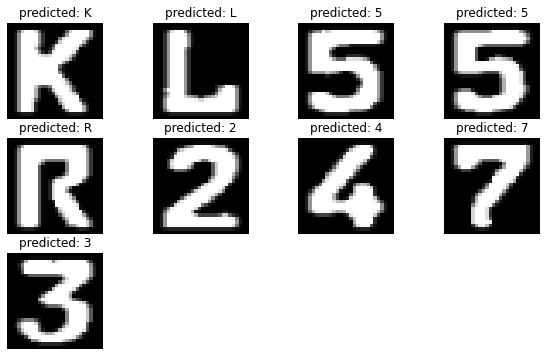

In [ ]:
# Segmented characters and their predicted value.
plt.figure(figsize=(10,6))
for i,ch in enumerate(char):
    img = cv2.resize(ch, (28,28), interpolation=cv2.INTER_AREA)
    plt.subplot(3,4,i+1)
    plt.imshow(img,cmap='gray')
    plt.title(f'predicted: {show_results()[i]}')
    plt.axis('off')
plt.show()

In [ ]:
labels=pd.read_excel('/content/gdrive/MyDrive/test_dataset/labels.xlsx')
labels['ID']=labels['ID'].map(str)
labels

,ID,NUMBER
0,1,KL55R2473
1,2,BAV9R93
2,3,KL16J3636
3,4,GAR1P11
4,5,PJJ1L76
...,...,...
181,182,DHF5B15
182,183,DBJ5R59
183,184,LVY8X45
184,185,YYD6B61


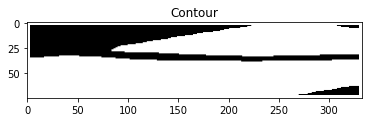

 JED8X17


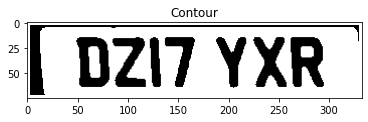

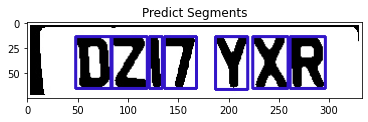

1/1 [==============================] - 0s 13ms/step
DZ17YXR DZ17YXR


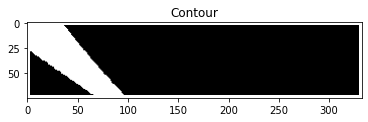

 YYD6B61


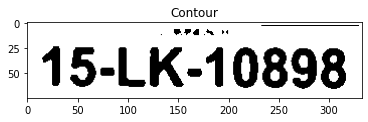

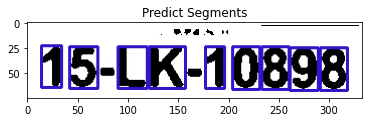

1/1 [==============================] - 0s 13ms/step
1SLK10898 15LK10898


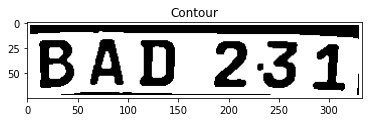

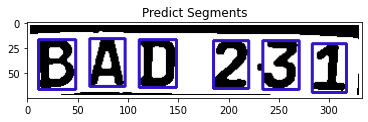

1/1 [==============================] - 0s 14ms/step
BAD231 BAD231


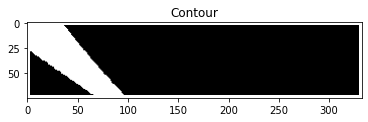

 YYD6B61


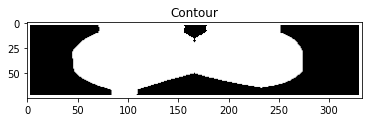

 DBJ5R59


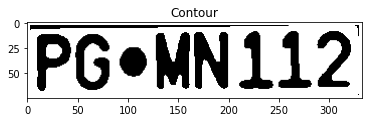

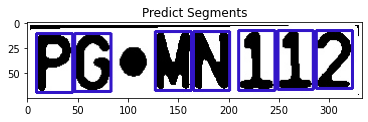

1/1 [==============================] - 0s 14ms/step
PGMN112 PGMN112


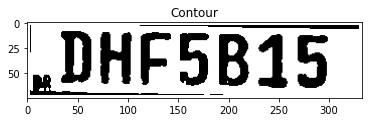

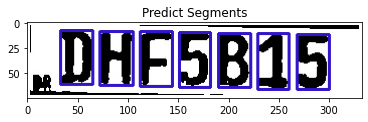

1/1 [==============================] - 0s 17ms/step
DHF5B15 DHF5B15


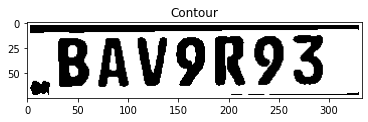

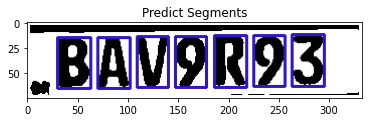

1/1 [==============================] - 0s 18ms/step
BAV9R93 BAV9R93


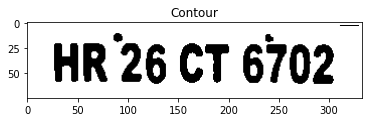

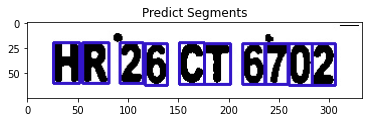

1/1 [==============================] - 0s 17ms/step
HR26CT6702 HR26CT6702


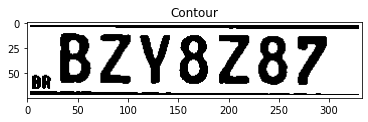

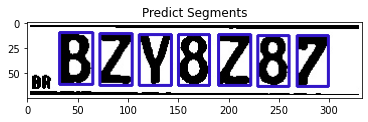

1/1 [==============================] - 0s 18ms/step
BZY8Z87 BZY8Z87


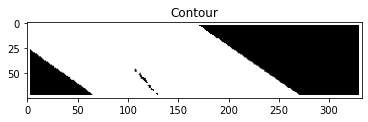

 PJJ1L76


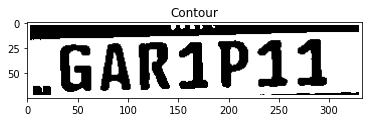

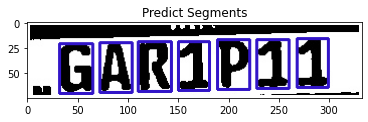

1/1 [==============================] - 0s 14ms/step
GAR1P11 GAR1P11


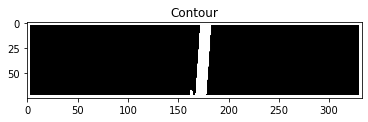

 YTZ8U13


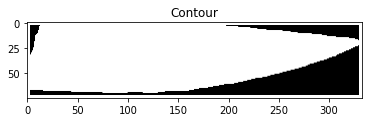

 ZZL1X36


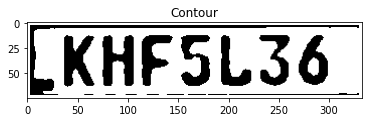

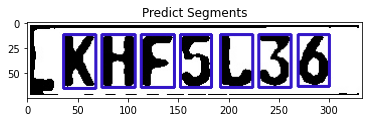

1/1 [==============================] - 0s 15ms/step
KHF5L36 KHF5L36


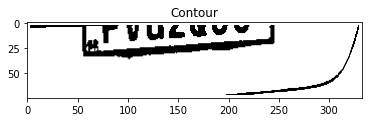

 FVG2Q86


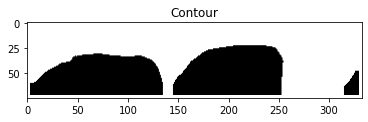

 FAD3Z97


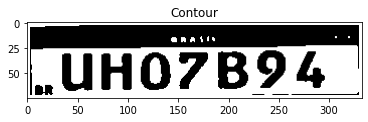

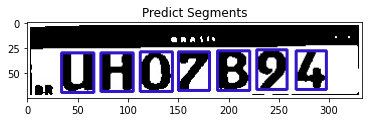

1/1 [==============================] - 0s 16ms/step
UH07B94 UH07B94


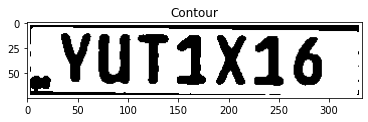

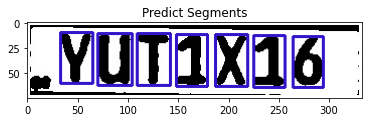

1/1 [==============================] - 0s 14ms/step
YUT1X16 YUT1X16


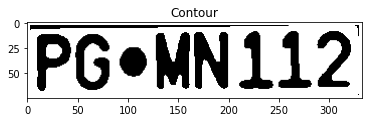

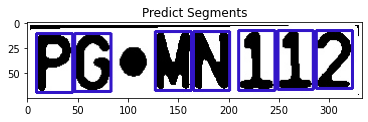

1/1 [==============================] - 0s 14ms/step
PGMN112 PGMN112


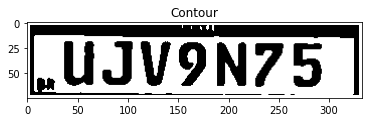

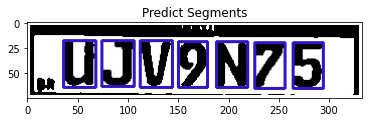

1/1 [==============================] - 0s 16ms/step
UJV9N75 UJV9N75


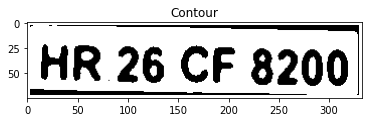

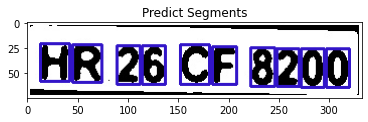

1/1 [==============================] - 0s 13ms/step
HR26CF8200 HR26CF8200


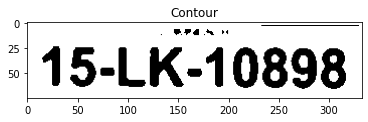

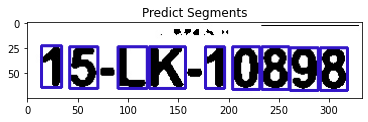

1/1 [==============================] - 0s 17ms/step
1SLK10898 15LK10898


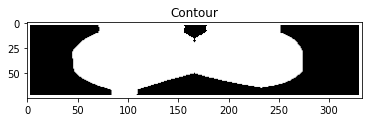

 DBJ5R59


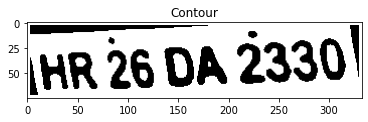

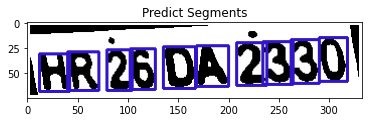

1/1 [==============================] - 0s 14ms/step
HR26DA233 HR26DA2330


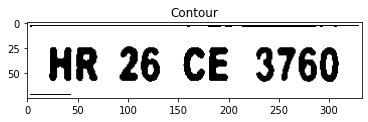

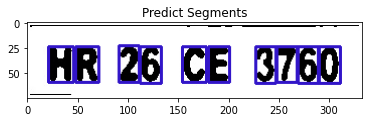

1/1 [==============================] - 0s 14ms/step
HR26CE3760 HR26CE3760


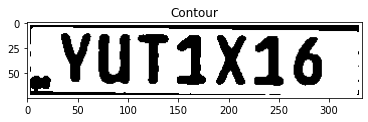

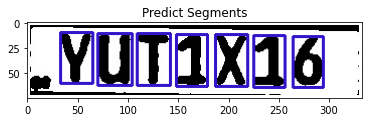

1/1 [==============================] - 0s 14ms/step
YUT1X16 YUT1X16


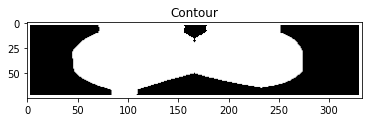

 DBJ5R59


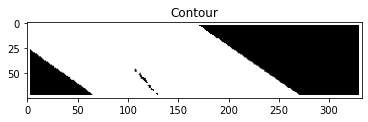

 PJJ1L76


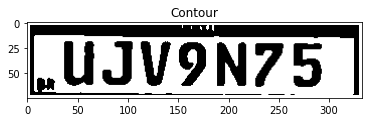

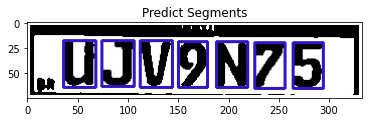

1/1 [==============================] - 0s 14ms/step
UJV9N75 UJV9N75


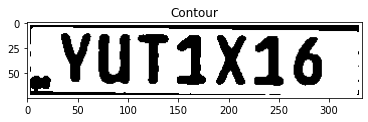

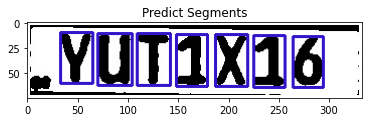

1/1 [==============================] - 0s 15ms/step
YUT1X16 YUT1X16


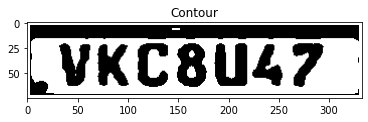

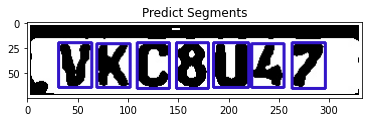

1/1 [==============================] - 0s 15ms/step
VKE8UA7 VKC8U47


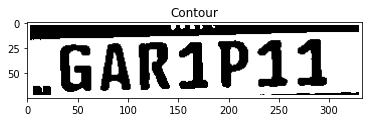

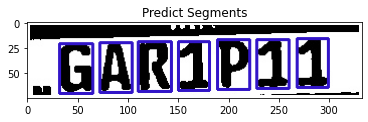

1/1 [==============================] - 0s 14ms/step
GAR1P11 GAR1P11


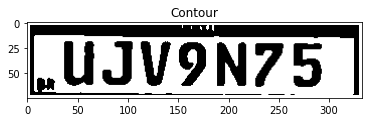

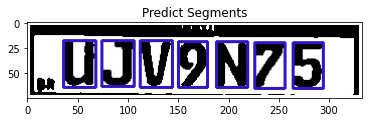

1/1 [==============================] - 0s 14ms/step
UJV9N75 UJV9N75


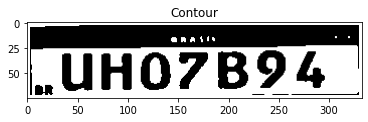

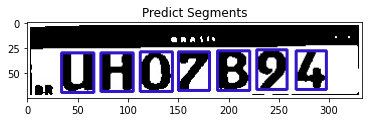

1/1 [==============================] - 0s 15ms/step
UH07B94 UH07B94


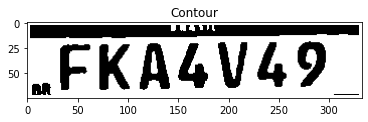

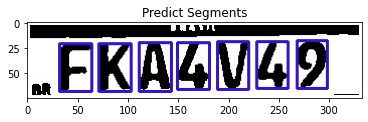

1/1 [==============================] - 0s 14ms/step
FKAAVA9 FKA4V49


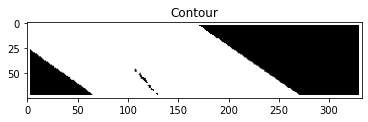

 PJJ1L76


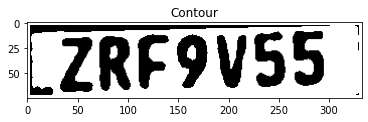

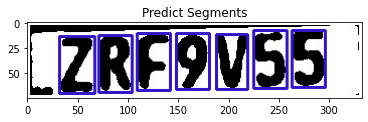

1/1 [==============================] - 0s 15ms/step
ZRF9V55 ZRF9V55


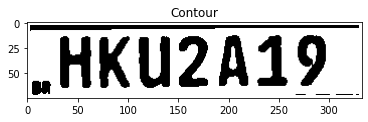

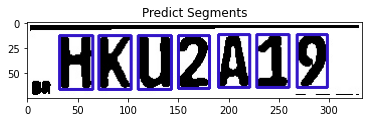

1/1 [==============================] - 0s 13ms/step
HKU2A19 HKU2A19


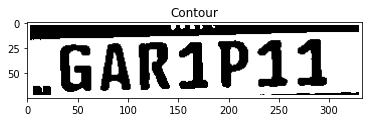

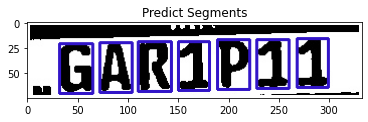

1/1 [==============================] - 0s 14ms/step
GAR1P11 GAR1P11


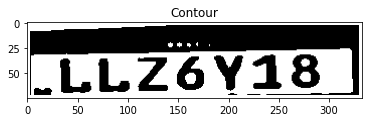

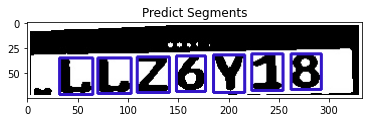

1/1 [==============================] - 0s 14ms/step
LLZ6Y18 LLZ6Y18


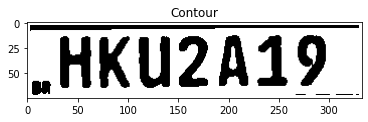

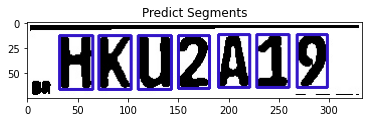

1/1 [==============================] - 0s 14ms/step
HKU2A19 HKU2A19


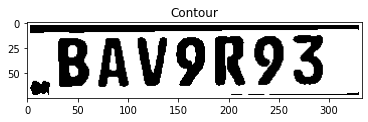

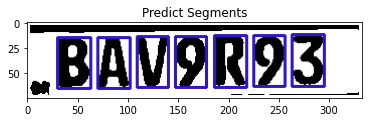

1/1 [==============================] - 0s 17ms/step
BAV9R93 BAV9R93


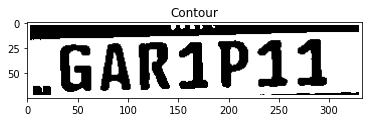

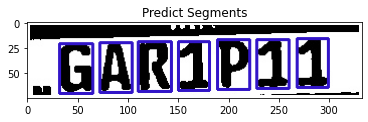

1/1 [==============================] - 0s 16ms/step
GAR1P11 GAR1P11


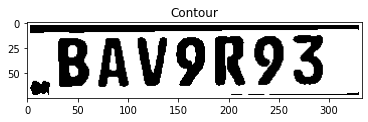

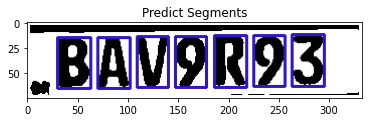

1/1 [==============================] - 0s 21ms/step
BAV9R93 BAV9R93


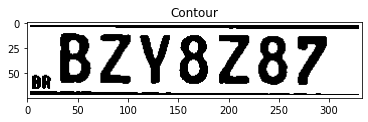

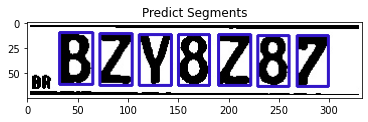

1/1 [==============================] - 0s 24ms/step
BZY8Z87 BZY8Z87


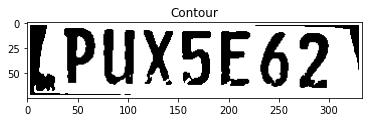

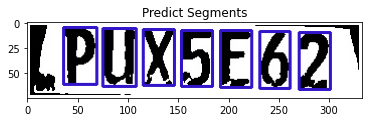

1/1 [==============================] - 0s 22ms/step
PUX5E62 PUX5E62


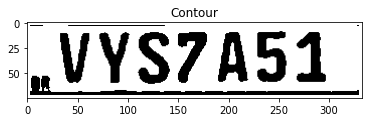

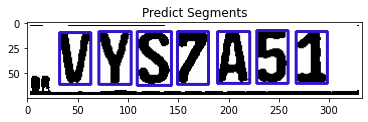

1/1 [==============================] - 0s 22ms/step
VYS7A51 VYS7A51


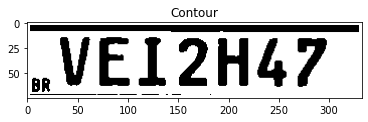

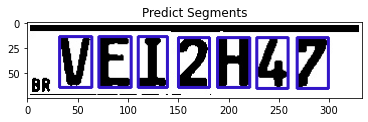

1/1 [==============================] - 0s 14ms/step
VEI2H47 VEI2H47


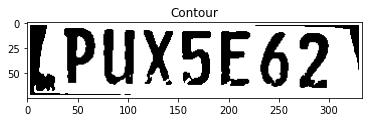

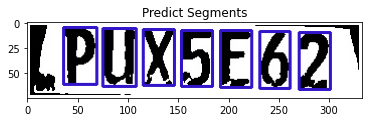

1/1 [==============================] - 0s 14ms/step
PUX5E62 PUX5E62


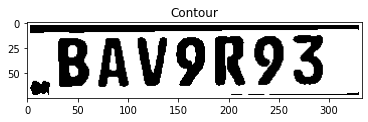

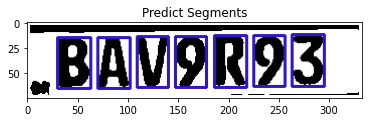

1/1 [==============================] - 0s 17ms/step
BAV9R93 BAV9R93


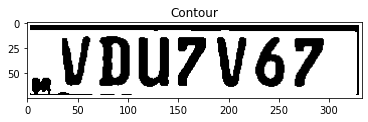

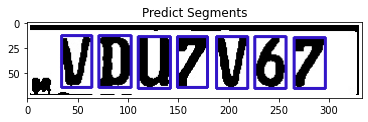

1/1 [==============================] - 0s 14ms/step
UDU7V67 VDU7V67


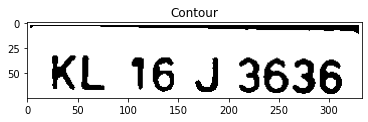

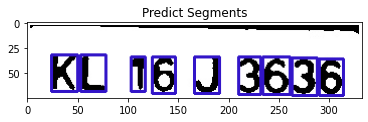

1/1 [==============================] - 0s 14ms/step
KL16J3636 KL16J3636


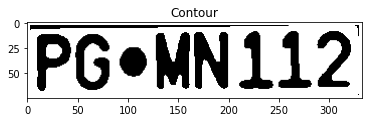

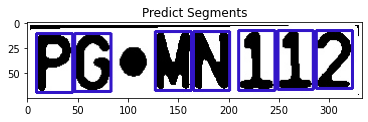

1/1 [==============================] - 0s 14ms/step
PGMN112 PGMN112


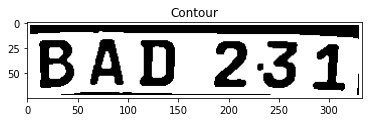

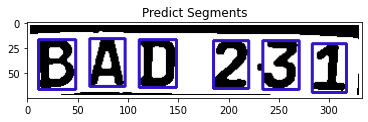

1/1 [==============================] - 0s 15ms/step
BAD231 BAD231


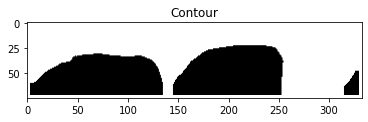

 FAD3Z97


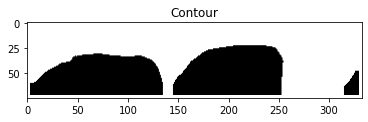

 FAD3Z97


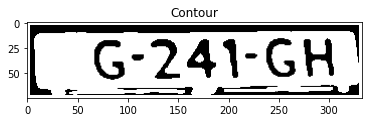

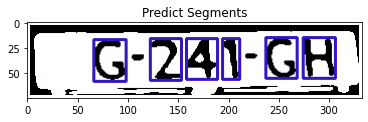

1/1 [==============================] - 0s 18ms/step
G241GH G241GH


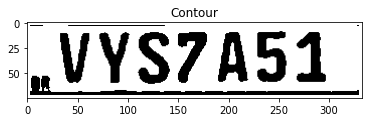

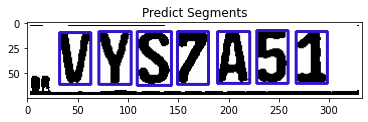

1/1 [==============================] - 0s 15ms/step
VYS7A51 VYS7A51


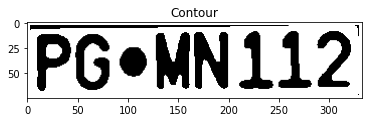

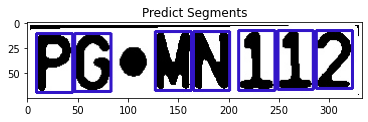

1/1 [==============================] - 0s 17ms/step
PGMN112 PGMN112


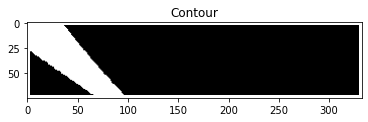

 YYD6B61


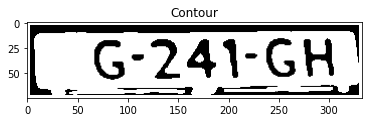

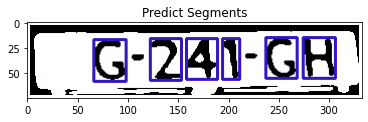

1/1 [==============================] - 0s 17ms/step
G241GH G241GH


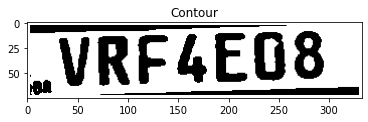

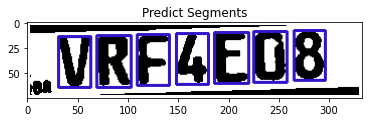

1/1 [==============================] - 0s 18ms/step
VRFAED8 VRF4E08


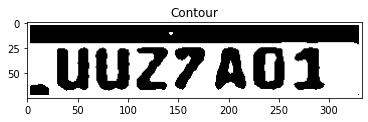

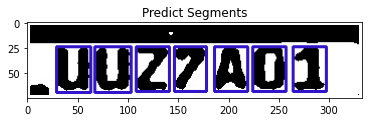

1/1 [==============================] - 0s 23ms/step
UUZ7AD1 UUZ7A01


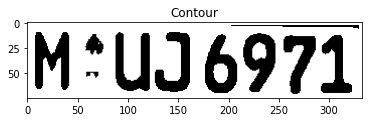

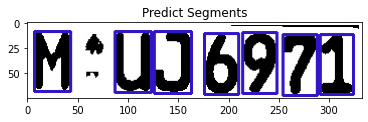

1/1 [==============================] - 0s 19ms/step
MUJ6971 MUJ6971


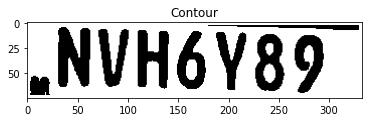

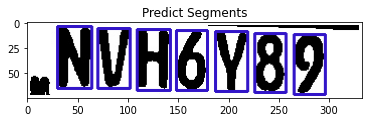

1/1 [==============================] - 0s 18ms/step
NVH6Y89 NVH6Y89


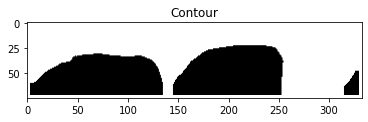

 FAD3Z97


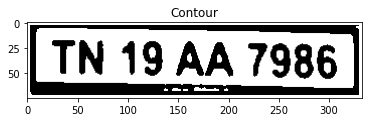

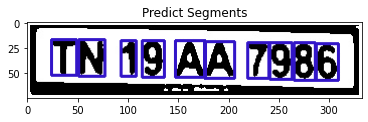

1/1 [==============================] - 0s 14ms/step
TN19AA7986 TN19AA7986


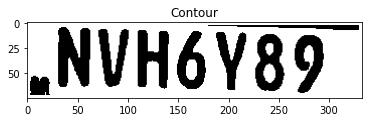

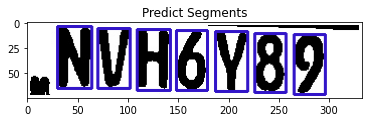

1/1 [==============================] - 0s 17ms/step
NVH6Y89 NVH6Y89


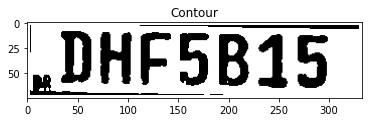

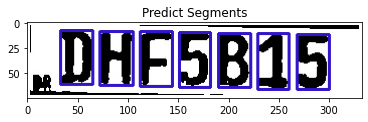

1/1 [==============================] - 0s 19ms/step
DHF5B15 DHF5B15


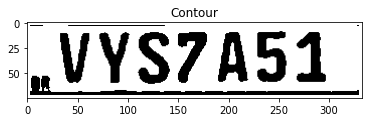

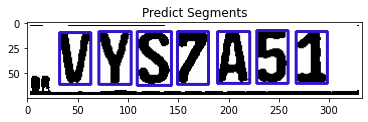

1/1 [==============================] - 0s 22ms/step
VYS7A51 VYS7A51


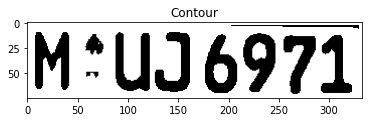

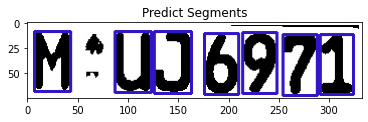

1/1 [==============================] - 0s 19ms/step
MUJ6971 MUJ6971


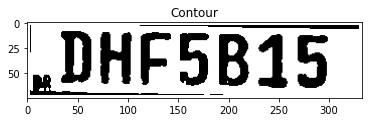

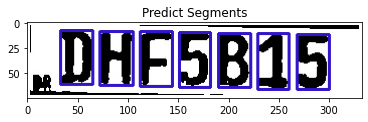

1/1 [==============================] - 0s 19ms/step
DHF5B15 DHF5B15


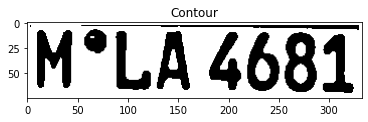

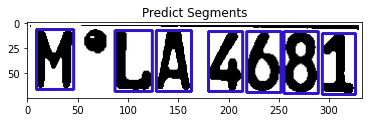

1/1 [==============================] - 0s 20ms/step
HLA4681 MLA4681


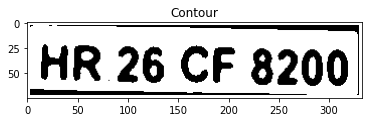

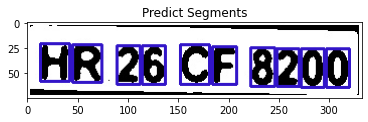

1/1 [==============================] - 0s 21ms/step
HR26CF8200 HR26CF8200


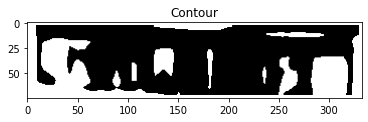

 UHK5055


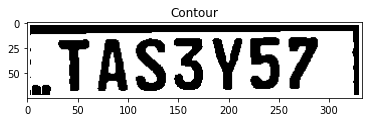

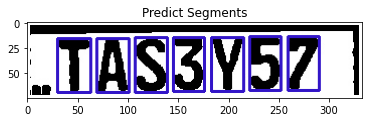

1/1 [==============================] - 0s 21ms/step
TAS3Y57 TAS3Y57


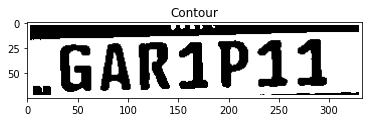

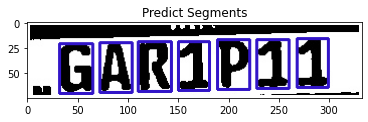

1/1 [==============================] - 0s 24ms/step
GAR1P11 GAR1P11


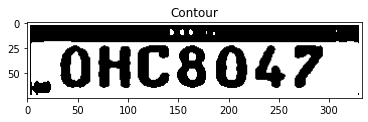

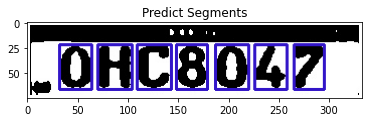

1/1 [==============================] - 0s 25ms/step
0HC8047 0HC8047


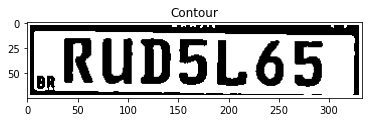

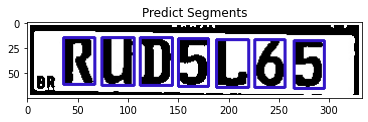

1/1 [==============================] - 0s 20ms/step
RUD5L65 RUD5L65


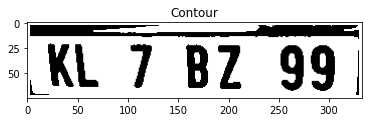

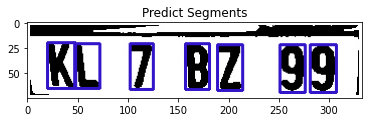

1/1 [==============================] - 0s 26ms/step
KL7BZ99 KL7BZ99


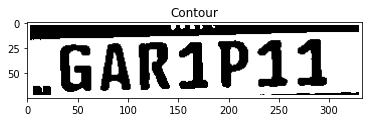

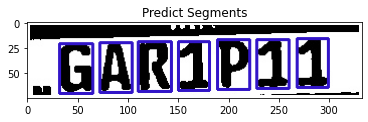

1/1 [==============================] - 0s 19ms/step
GAR1P11 GAR1P11


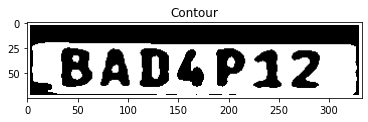

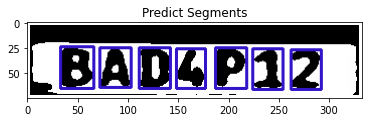

1/1 [==============================] - 0s 21ms/step
BAD4P12 BAD4P12


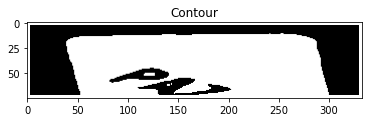

 ZYZ6V58


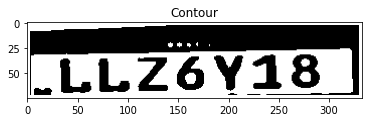

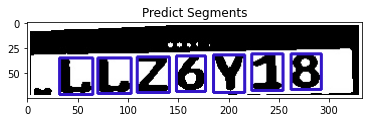

1/1 [==============================] - 0s 20ms/step
LLZ6Y18 LLZ6Y18


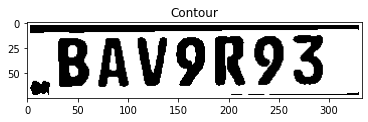

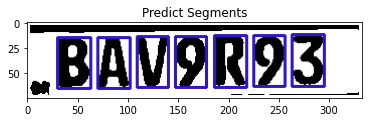

1/1 [==============================] - 0s 22ms/step
BAV9R93 BAV9R93


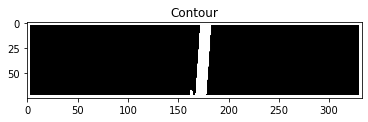

 YTZ8U13


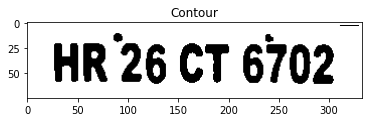

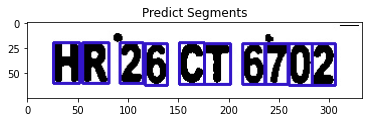

1/1 [==============================] - 0s 20ms/step
HR26CT6702 HR26CT6702


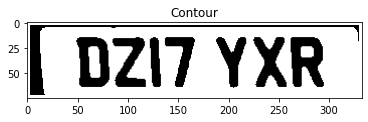

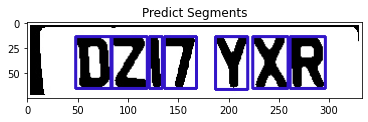

1/1 [==============================] - 0s 19ms/step
DZ17YXR DZ17YXR


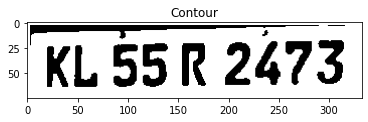

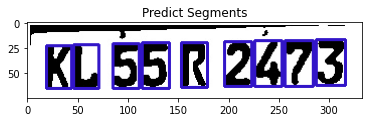

1/1 [==============================] - 0s 21ms/step
KL55R2473 KL55R2473


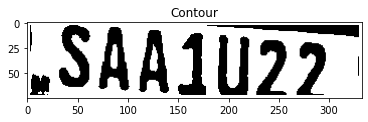

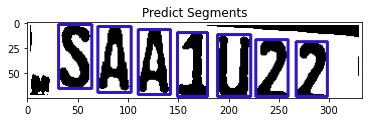

1/1 [==============================] - 0s 20ms/step
SAA1U22 SAA1U22


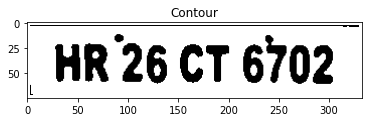

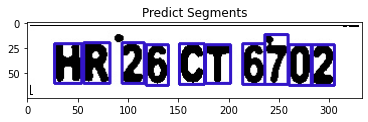

1/1 [==============================] - 0s 25ms/step
HR26CT6Y02 HR26CT6Y02


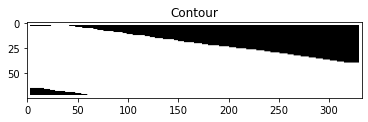

 HPJ7U96


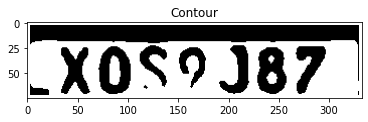

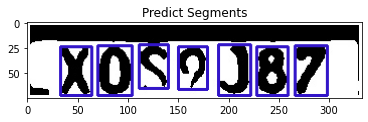

1/1 [==============================] - 0s 19ms/step
X0RQJ87 X0S9J87


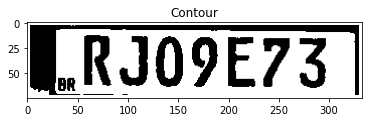

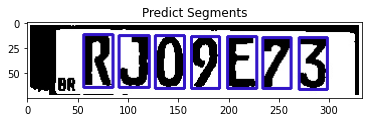

1/1 [==============================] - 0s 20ms/step
RJ09E73 RJ09E73


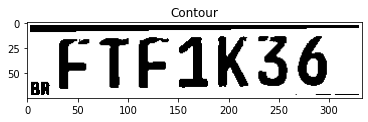

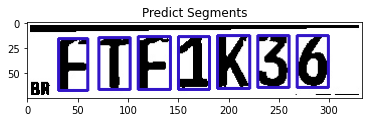

1/1 [==============================] - 0s 23ms/step
FTF1K36 FTF1K36


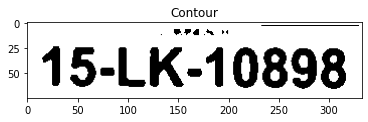

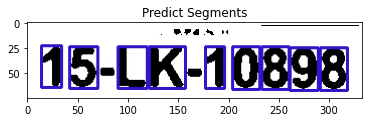

1/1 [==============================] - 0s 20ms/step
1SLK10898 15LK10898


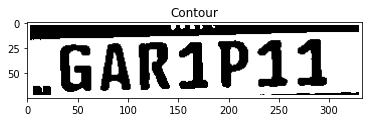

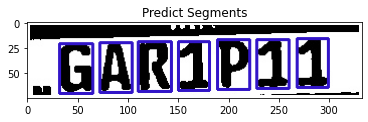

1/1 [==============================] - 0s 20ms/step
GAR1P11 GAR1P11


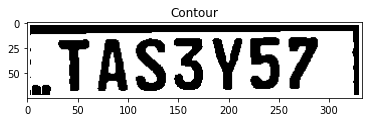

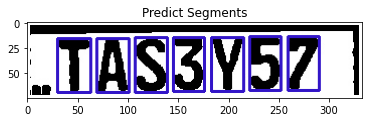

1/1 [==============================] - 0s 20ms/step
TAS3Y57 TAS3Y57


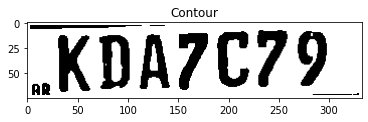

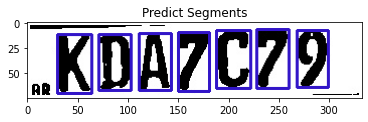

1/1 [==============================] - 0s 24ms/step
KDA7E79 KDA7C79


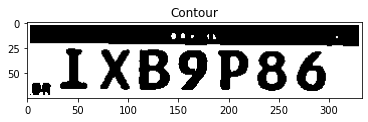

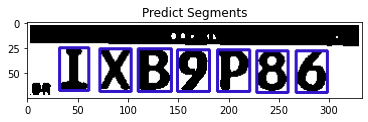

1/1 [==============================] - 0s 22ms/step
IXB9P86 IXB9P86


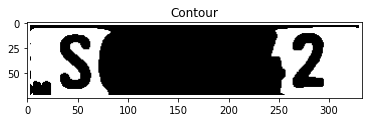

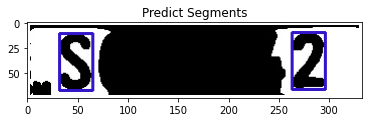

1/1 [==============================] - 0s 23ms/step
S2 S0A4R42
Accuracy: 63.63636363636363%


In [ ]:
file_list=os.listdir("/content/gdrive/MyDrive/test_dataset/images")
count=0
for path in file_list:
    no=path[:-4]
    row=labels['NUMBER'].where(labels['ID'] == no).dropna().values[0]
    image = cv2.imread('/content/gdrive/MyDrive/test_dataset/images/'+path)
    # Resize the image - change width to 500
    image = imutils.resize(image, width=500)
    img=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # RGB to Gray scale conversion
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Noise removal with iterative bilateral filter(removes noise while preserving edges)
    gray = cv2.bilateralFilter(gray, 11, 17, 17)

    # Find Edges of the grayscale image
    edged = cv2.Canny(gray, 170, 200)

    # Find contours based on Edges
    cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]
    cnts=sorted(cnts, key = cv2.contourArea, reverse = True)[:30] #sort contours based on their area keeping minimum required area as '30' (anything smaller than this will not be considered)
    NumberPlateCnt = None #we currently have no Number plate contour

    # loop over our contours to find the best possible approximate contour of number plate
    for c in cnts:
            peri = cv2.arcLength(c, True)
            approx = cv2.approxPolyDP(c, 0.02 * peri, True)
            if len(approx) == 4:  # Select the contour with 4 corners
                NumberPlateCnt = approx #This is our approx Number Plate Contour
                x,y,w,h = cv2.boundingRect(c)
                ROI = img[y:y+h, x:x+w]
                break

    idx=0
    m=0
    if NumberPlateCnt is None:
        continue
    for i in range(4):
        if NumberPlateCnt[i][0][1]>m:
            idx=i
            m=NumberPlateCnt[i][0][1]
    if idx==0:
        pin=3
    else:
        pin=idx-1
    if idx==3:
        nin=0
    else:
        nin=idx+1

    p=dist(NumberPlateCnt[idx][0][0], NumberPlateCnt[pin][0][0], NumberPlateCnt[idx][0][1], NumberPlateCnt[pin][0][1])
    n=dist(NumberPlateCnt[idx][0][0], NumberPlateCnt[nin][0][0], NumberPlateCnt[idx][0][1], NumberPlateCnt[nin][0][1])

    if p>n:
        if NumberPlateCnt[pin][0][0]<NumberPlateCnt[idx][0][0]:
            left=pin
            right=idx
        else:
            left=idx
            right=pin
        d=p
    else:
        if NumberPlateCnt[nin][0][0]<NumberPlateCnt[idx][0][0]:
            left=nin
            right=idx
        else:
            left=idx
            right=nin
        d=n
    left_x=NumberPlateCnt[left][0][0]
    left_y=NumberPlateCnt[left][0][1]
    right_x=NumberPlateCnt[right][0][0]
    right_y=NumberPlateCnt[right][0][1]

    opp=right_y-left_y
    hyp=((left_x-right_x)**2+(left_y-right_y)**2)**0.5
    sin=opp/hyp
    theta=math.asin(sin)*57.2958

    image_center = tuple(np.array(ROI.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, theta, 1.0)
    result = cv2.warpAffine(ROI, rot_mat, ROI.shape[1::-1], flags=cv2.INTER_LINEAR)

    if opp>0:
        h=result.shape[0]-opp//2
    else:
        h=result.shape[0]+opp//2
    result=result[0:h, :]
    char=segment_characters(result)
    plate=show_results()
    print(plate,row)
    if plate==row:
      count+=1
print("Accuracy: "+str((count/110)*100)+"%")